In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.applications.inception_v3 import InceptionV3
from  tensorflow.keras import models

2023-05-23 20:51:40.753542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size = 32
train_ds, val_ds = image_dataset_from_directory("raw_data/fer_2013/train", shuffle=True, seed = 42, subset = "both", image_size=(48, 48), color_mode = "grayscale", validation_split = 0.3, batch_size = batch_size)
test_ds = image_dataset_from_directory("raw_data/fer_2013/test", shuffle=True, seed = 42, image_size=(48, 48), color_mode = "grayscale", batch_size = batch_size)

Found 28709 files belonging to 7 classes.
Using 20097 files for training.
Using 8612 files for validation.
Found 7178 files belonging to 7 classes.


In [192]:
# Count the number of images in train_ds and val_ds, the actual number of images can be smaller as the last batch may be smaller than batch_size
num_test_images = train_ds.cardinality()*32
num_val_images = val_ds.cardinality()*32

classes_train = -1*np.ones(num_test_images)
idx = 0
for image, labels in train_ds:
    classes_train[idx*batch_size: idx*batch_size + len(labels.numpy())] = labels.numpy() 
    idx += 1
classes_train = classes_train[classes_train != -1]

classes_val = -1*np.ones(num_val_images)
idx = 0
for image, labels in val_ds:
    classes_val[idx*batch_size: idx*batch_size + len(labels.numpy())] = labels.numpy() 
    idx += 1
classes_val = classes_val[classes_val != -1]


In [216]:
num_test_images = test_ds.cardinality()*32
classes_test = -1*np.ones(num_test_images)
idx = 0
for image, labels in test_ds:
    classes_test[idx*batch_size: idx*batch_size + len(labels.numpy())] = labels.numpy() 
    idx += 1
classes_test = classes_test[classes_test != -1]

In [217]:
len(classes_train), len(classes_val), len(classes_test)

(20097, 8612, 7178)

In [234]:
class_count_train = np.unique(classes_train, return_counts = True)[1]/len(classes_train)
class_count_val = np.unique(classes_val, return_counts = True)[1]/len(classes_val)
class_count_test = np.unique(classes_test, return_counts = True)[1]/len(classes_test)

In [241]:
# Check for class imbalance
df_class_distribution = pd.DataFrame([class_count_train, class_count_val, class_count_test], index = ["class_percent_train", "class_percent_val", "class_percent_test"]).transpose()
df_class_distribution.head(7)

,class_percent_train,class_percent_val,class_percent_test
0,0.139573,0.138179,0.133463
1,0.015773,0.013818,0.015464
2,0.142310,0.143637,0.142658
3,0.254167,0.244659,0.247144
4,0.172513,0.173943,0.171775
5,0.167388,0.170228,0.173725
6,0.108275,0.115536,0.115770


In [245]:
most_frequent_class = df_class_distribution["class_percent_train"].argmax()

In [260]:
# baseline model
def baseline_model(train_ds, val_ds):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(96,96, 3),
        classes=7,
        classifier_activation="softmax"
    )
    base_model.trainable = False
 
    model = Sequential([
      base_model,
      GlobalAveragePooling2D(),
      Dense(10, activation='softmax', kernel_initializer=RandomNormal())
    ])
    return model

In [261]:
model = baseline_model(train_ds, val_ds)

NameError: name 'Sequential' is not defined

In [236]:
np.sort(class_count_train)

array([0.0157735 , 0.10827487, 0.13957307, 0.1423098 , 0.16738817,
       0.17251331, 0.25416729])

In [221]:
class_names[1]

'disgust'

In [110]:
# Determine how many samples per class
#classes_train = [class_number for class_number in labels_batch.numpy() for image, labels in train_ds]
classes_train = np.array([labels.numpy() for images, labels in train_ds])

/var/folders/fh/pzrx_1zd21z3s0mfnnm9q8sc0000gn/T/ipykernel_2926/4152089707.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  classes_train = np.array([labels.numpy() for images, labels in train_ds])


In [60]:
classes_train = np.zeros(,1)
for image, labels in train_ds:
    classes_train = np.concatenate(classes_train, labels_batch.numpy())

TypeError: only integer scalar arrays can be converted to a scalar index

In [58]:
classes_train

AttributeError: 'list' object has no attribute 'max'

In [49]:
image_batch, labels_batch = next(iter(train_ds))

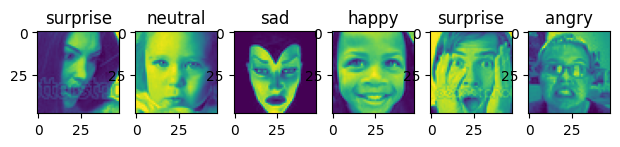

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,12, i+1)
    img = image_batch[i]
    label = labels_batch.numpy()[i]
    plt.imshow(img)
    plt.title(class_names[label])

In [48]:
normalization_layer = keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [35]:
image_batch.shape

TensorShape([32, 256, 256, 3])

In [36]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 5, 4, 3, 0, 0, 3, 5, 0, 3, 3, 3, 2, 3, 4, 3, 1, 0, 5, 2, 0, 5,
       6, 5, 6, 0, 2, 6, 5, 4, 3, 2], dtype=int32)>